# Linier Regression

## Retrive Data

In [4]:
import (
    "gonum.org/v1/plot" 
    "gonum.org/v1/plot/plotter" 
    "github.com/go-gota/gota/dataframe"
    "github.com/janpfeifer/gonb/gonbui"
)

In [2]:
func getDataframe(file string) (dataframe.DataFrame, error) {
    var df dataframe.DataFrame 
    f, err := os.Open(file)
    if err != nil {
        return df, err
    }
    defer f.Close()

    return dataframe.ReadCSV(f), nil
}

In [23]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
    fmt.Println(err)
    return
}

fmt.Println(df)

[200x5] DataFrame

    X0    TV         Radio     Newspaper Sales
 0: 1     230.100000 37.800000 69.200000 22.100000
 1: 2     44.500000  39.300000 45.100000 10.400000
 2: 3     17.200000  45.900000 69.300000 9.300000
 3: 4     151.500000 41.300000 58.500000 18.500000
 4: 5     180.800000 10.800000 58.400000 12.900000
 5: 6     8.700000   48.900000 75.000000 7.200000
 6: 7     57.500000  32.800000 23.500000 11.800000
 7: 8     120.200000 19.600000 11.600000 13.200000
 8: 9     8.600000   2.100000  1.000000  4.800000
 9: 10    199.800000 2.600000  21.200000 10.600000
    ...   ...        ...       ...       ...
    <int> <float>    <float>   <float>   <float>



Terlihat data mempunyai 5 Fitur (X0, TV, Radio, Newspaper, Sales). Namun Fitur pertama tidak dibutuhkan karena hanya berisi informasi nomor urut.

## Describe Data
Pelajari data dengan meihat statistik data meliputi mean, median, standar deviasi, min, quantile25, median, quantile75, dan max.

In [22]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
    fmt.Println(err)
    return
}

df = df.Select([]int{1,2,3,4})

fmt.Println(df.Describe())

[8x5] DataFrame

    column   TV         Radio     Newspaper  Sales
 0: mean     147.042500 23.264000 30.554000  14.022500
 1: median   149.750000 22.900000 25.750000  12.900000
 2: stddev   85.854236  14.846809 21.778621  5.217457
 3: min      0.700000   0.000000  0.300000   1.600000
 4: 25%      73.400000  9.900000  12.600000  10.300000
 5: 50%      149.700000 22.500000 25.600000  12.900000
 6: 75%      218.500000 36.500000 45.100000  17.400000
 7: max      296.400000 49.600000 114.000000 27.000000
    <string> <float>    <float>   <float>    <float>



## Histogram

Untuk mempelajari data apakah sesuai dengan asumsi-asumsi regresi linier, kita perlu melihat distribusi data apakah mengikuti distribusi normal atau tidak. Cara yang termudah adalah dengan membuat histogram.

In [16]:
func createPlot(data []float64, name string, plotType string) []byte {
    v := make(plotter.Values, len(data)) 
    for i, floatVal := range data { 
        v[i] = floatVal 
    }
    
    p := plot.New() 
    p.Title.Text = fmt.Sprintf("%s of a %s", plotType, name) 
    
    switch plotType {
	case "Box Plot":
		b, err := plotter.NewBoxPlot(vg.Points(50), 0, v) 
        if err != nil { 
            log.Fatal(err) 
        }
        p.Add(b)
	default:
		h, err := plotter.NewHist(v, 16) 
        if err != nil { 
            log.Fatal(err) 
        }
        h.Normalize(1) 
        p.Add(h)
	}
    
    
    buf := bytes.NewBuffer(nil)
    writerTo, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    writerTo.WriteTo(buf)
    return buf.Bytes()
}

In [6]:
func display(df dataframe.DataFrame, col string, plotType string) {
    data := df.Col(col).Float() 
    gonbui.DisplayPng(createPlot(data, col, plotType))
}

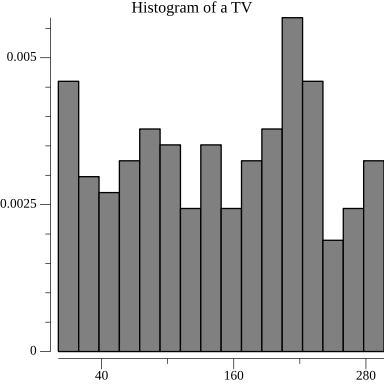

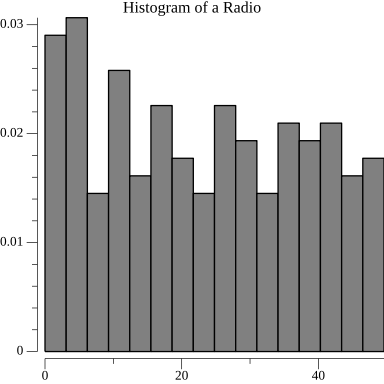

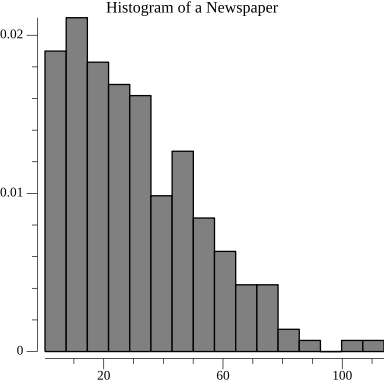

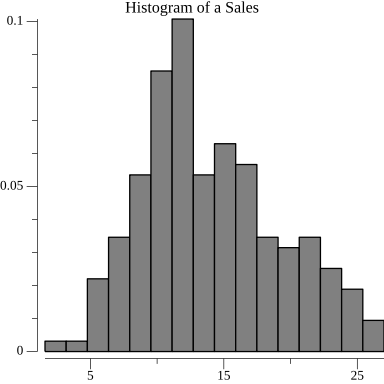

In [20]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
    fmt.Println(err)
    return
}

df = df.Select([]int{1,2,3,4}) 

for _, col := range df.Names() {
    display(df, col, "Histogram")
}

Sekarang, setelah melihat histogram dan statistik ringkasan yang kita hitung, kita perlu mempertimbangkan apakah kita bekerja sesuai dengan asumsi regresi linier. Secara khusus, kita dapat melihat bahwa tidak semua variabel kita berdistribusi normal (berbentuk lonceng). Penjualan mungkin berbentuk lonceng, tetapi yang lainnya tidak terlihat normal.

Kita bisa menggunakan alat statistik, seperti plot quantile-quantile (q-q), untuk menentukan seberapa dekat distribusi dengan distribusi normal, dan kita bahkan bisa melakukan uji statistik untuk menentukan probabilitas variabel mengikuti distribusi normal. Namun, sebagian besar waktu, kita bisa mendapatkan gambaran umum dari histogram.

Sekarang kita harus mengambil keputusan. Setidaknya sebagian data kita secara teknis tidak sesuai dengan asumsi model regresi linier kita. Kita sekarang dapat melakukan salah satu dari berikut:

* Transformasi Variabel: Kita bisa mencoba mentransformasi variabel kita (misalnya, dengan transformasi pangkat) yang mengikuti distribusi normal, lalu menggunakan variabel tertransformasi ini dalam model regresi linier kita. Keuntungan dari opsi ini adalah kita akan beroperasi sesuai dengan asumsi model. Kerugiannya adalah model kita akan menjadi lebih sulit dipahami dan kurang dapat diinterpretasikan.
* Mendapatkan Data Baru: Mencari data lain untuk menyelesaikan masalah kita.
* Membuat Model dengan Abaikan Asumsi: Mengabaikan masalah kita dengan asumsi regresi linier dan mencoba membuat model.

Mungkin ada pandangan lain tentang ini, tetapi rekomendasi saya adalah mencoba opsi ketiga terlebih dahulu. Tidak banyak kerugian dalam opsi ini karena Anda dapat melatih model regresi linier dengan cepat. Jika Anda mendapatkan model yang berkinerja baik, Anda telah menghindari komplikasi lebih lanjut dan memiliki model sederhana yang bagus. Jika Anda mendapatkan model yang berkinerja buruk, Anda mungkin perlu menggunakan salah satu opsi lainnya.

## Memilih Variabel Independen dengan Scatter Plot

Setelah memahami data dan kesesuaiannya dengan asumsi model regresi linier, kita perlu memilih variabel yang akan digunakan sebagai variabel independen untuk memprediksi variabel dependen (rata-rata poin per game).

Cara termudah untuk membuat keputusan ini adalah dengan mengeksplorasi secara visual korelasi antara variabel dependen dan semua pilihan yang Anda miliki untuk variabel independen. Secara khusus, Anda dapat membuat plot sebar (menggunakan gonum.org/v1/plot) dari variabel dependen Anda versus masing-masing variabel lainnya:

In [29]:
func scatter(df dataframe.DataFrame) {
    yVals := df.Col("Sales").Float()
    for _, colName := range df.Names() { 
        pts := make(plotter.XYs, df.Nrow()) 
        for i, floatVal := range df.Col(colName).Float() { 
            pts[i].X = floatVal 
            pts[i].Y = yVals[i] 
        }
        p := plot.New() 
        p.X.Label.Text = colName 
        p.Y.Label.Text = "y" 
        p.Add(plotter.NewGrid()) 
        s, err := plotter.NewScatter(pts) 
        if err != nil { 
            log.Fatal(err) 
        }
        s.GlyphStyle.Radius = vg.Points(3)
        p.Add(s) 
        
        buf := bytes.NewBuffer(nil)
        writerTo, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
        if err != nil {
            panic(err)
        }
        writerTo.WriteTo(buf)

        gonbui.DisplayPng(buf.Bytes())
    }
}

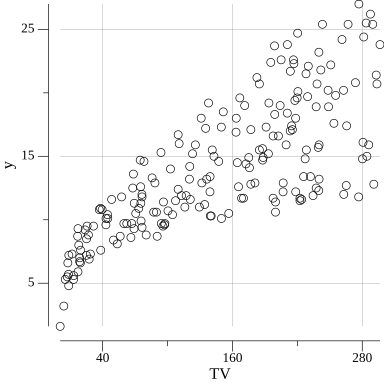

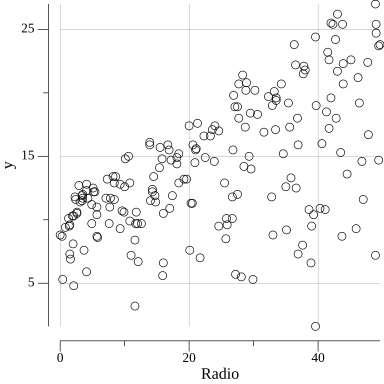

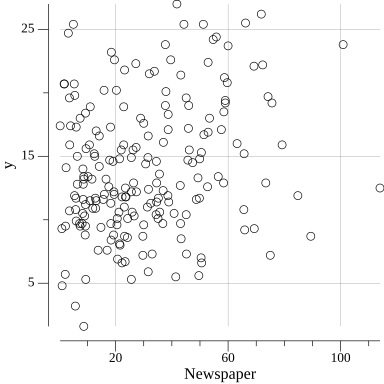

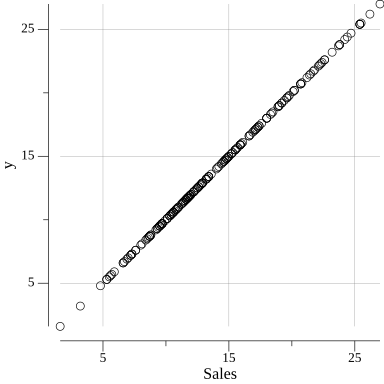

In [30]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
    fmt.Println(err)
    return
}

df = df.Select([]int{1,2,3,4}) 

scatter(df)

Dengan melihat plot sebar ini, Anda dapat mengamati korelasi antara variabel dependen (rata-rata poin per game) dengan masing-masing variabel independen. Variabel independen yang menunjukkan korelasi linier terkuat (positif atau negatif) dengan variabel dependen kemungkinan merupakan kandidat terbaik untuk model regresi linier Anda.

Setelah melihat plot sebar ini, kita ingin menyimpulkan atribut mana (TV, Radio, dan/atau Koran) yang memiliki hubungan linear dengan variabel dependen kita, Penjualan. Artinya, bisakah kita menarik garis pada salah satu plot sebar ini yang sesuai dengan tren Penjualan versus atribut terkait? Ini tidak selalu mungkin, dan kemungkinan tidak mungkin untuk semua atribut yang harus Anda tangani untuk masalah tertentu.

Dalam kasus ini, baik Radio maupun TV tampaknya berkorelasi linear dengan Penjualan. Koran mungkin sedikit berkorelasi dengan Penjualan, tetapi korelasinya jauh dari jelas. Hubungan linear dengan TV terlihat paling jelas, jadi mari kita mulai dengan TV sebagai variabel independen dalam model regresi linier kita. Ini akan membuat rumus regresi linier kita menjadi sebagai berikut:

Sales = m * TV + b

(di mana m adalah kemiringan garis dan b adalah intersep)

Perlu dicatat bahwa meskipun Radio juga menunjukkan beberapa korelasi linear dengan Penjualan, kita memilih untuk fokus pada TV terlebih dahulu. Kita selalu dapat membuat model regresi linier lain nanti untuk memprediksi Penjualan menggunakan Radio, atau mungkin kombinasi dari TV dan Radio (regresi linear multipel).

Satu hal lain yang perlu diperhatikan di sini adalah bahwa variabel TV mungkin tidak benar-benar homoskedastis, yang telah dibahas sebelumnya sebagai asumsi regresi linier. Ini perlu dicatat (dan kemungkinan perlu didokumentasikan dalam proyek), tetapi kita akan terus melihat apakah kita dapat membuat model regresi linier dengan beberapa daya prediksi. Kita selalu dapat meninjau kembali asumsi ini jika model kita berperilaku buruk, sebagai penjelasan yang mungkin.

Meskipun TV mungkin melanggar asumsi homoskedastisitas dari regresi linier, kita dapat tetap mencoba membangun model menggunakan TV terlebih dahulu. Jika model berkinerja buruk, kita dapat kembali dan mengatasi pelanggaran asumsi ini (misalnya, dengan mentransformasi variabel) atau mencoba variabel independen lainnya (misalnya, Radio).

Pada akhirnya, tujuannya adalah untuk menemukan model yang paling akurat dan mudah diinterpretasikan untuk masalah yang sedang dihadapi.

## Membagi Data menjadi Training dan Test Set

Untuk menghindari overfitting dan memastikan model kita dapat digeneralisasi, kita akan membagi dataset kita menjadi training set dan test set. Kita tidak akan repot-repot dengan holdout set di sini, karena kita hanya akan melakukan sekali pelatihan model tanpa bolak-balik iteratif antara pelatihan dan pengujian. Namun, jika Anda bereksperimen dengan berbagai variabel dependen dan/atau secara iteratif menyesuaikan parameter model Anda, Anda perlu membuat holdout set yang Anda simpan hingga akhir proses pengembangan model untuk validasi.

Kita akan menggunakan library untuk membuat training set dan test set, lalu menyimpannya ke file .csv masing-masing. Dalam kasus ini, kita akan menggunakan pembagian 80/20 untuk data training dan test kita.

In [33]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
    fmt.Println(err)
    return
}

df = df.Select([]int{1,2,3,4}) 

trainingNum := (4 * df.Nrow()) / 5 
testNum := df.Nrow() / 5 
if trainingNum+testNum < df.Nrow() { 
    trainingNum++ 
}

trainingIdx := make([]int, trainingNum) 
testIdx := make([]int, testNum) 

for i := 0; i < trainingNum; i++ { 
    trainingIdx[i] = i 
}

for i := 0; i < testNum; i++ { 
    testIdx[i] = trainingNum + i 
}

trainingDF := df.Subset(trainingIdx) 
testDF := df.Subset(testIdx)

setMap := map[int]dataframe.DataFrame{ 
    0: trainingDF, 
    1: testDF, 
}

for idx, setName := range []string{"01-training.csv", "01-test.csv"} { 
    f, err := os.Create(setName) 
    if err != nil { 
        log.Fatal(err) 
    }
    
    w := bufio.NewWriter(f) 
    if err := setMap[idx].WriteCSV(w); err != nil { 
        log.Fatal(err) 
    } 
}

Data yang digunakan di sini tidak diurutkan atau diurutkan berdasarkan data dengan cara apa pun. Namun, jika kita berurusan dengan data yang diurutkan berdasarkan respons, tanggal, atau cara lain apa pun, penting untuk membagi data secara acak menjadi set pelatihan dan pengujian. Jika tidak melakukan hal ini, rangkaian pelatihan dan pengujian mungkin hanya mencakup rentang respons tertentu, mungkin dipengaruhi secara artifisial oleh waktu/tanggal, dan seterusnya.

Berikut contoh perubahan kode jika menerapkan shuffling data.

In [35]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
  fmt.Println(err)
  return
}

df = df.Select([]int{1, 2, 3, 4})

trainingNum := (4 * df.Nrow()) / 5

// Shuffling data
allIdx := make([]int, df.Nrow())
for i := range allIdx {
  allIdx[i] = i
}
rand.Shuffle(len(allIdx), func(i, j int) { allIdx[i], allIdx[j] = allIdx[j], allIdx[i] })

// Gunakan indeks acak untuk split
trainingIdx := allIdx[:trainingNum]
testIdx := allIdx[trainingNum:]

trainingDF := df.Subset(trainingIdx)
testDF := df.Subset(testIdx)

setMap := map[int]dataframe.DataFrame{
  0: trainingDF,
  1: testDF,
}

for idx, setName := range []string{"01-shuffle-training.csv", "01-shuffle-test.csv"} {
  f, err := os.Create(setName)
  if err != nil {
    log.Fatal(err)
  }

  w := bufio.NewWriter(f)
  if err := setMap[idx].WriteCSV(w); err != nil {
    log.Fatal(err)
  }
}

## Melatih Model Regresi Linier

Selanjutnya, kita akan benar-benar melatih, atau fitting, model regresi linier kita. Ini berarti kita menemukan kemiringan (m) dan intersep (b) untuk garis yang meminimalkan jumlah kuadrat kesalahan. Ada beberapa teknik/metode statistik untuk memperkirakan hubungan varibel dependen dengan variabel independen. Pada contoh ini, kita akan menggunakan metode OLS (Ordinary Least Squares).

### Ordinary Least Squares (OLS)

Tujuan:

* Menemukan garis regresi terbaik yang meminimalkan kesalahan kuadrat total antara nilai data yang diamati dan nilai yang diprediksi oleh model.
* Memperkirakan koefisien regresi yang mewakili kemiringan dan intersep garis regresi.

Asumsi:

* Model regresi linear: hubungan antara variabel dependen dan independen adalah linear.
* Homoskedastisitas: varians dari kesalahan prediksi adalah sama untuk semua nilai variabel independen.
* Non-autokorelasi: kesalahan prediksi tidak berkorelasi satu sama lain.
* Normalitas: kesalahan prediksi terdistribusi normal.

Keuntungan:

* Sederhana dan mudah dipahami.
* Mudah diimplementasikan dengan software statistik.
* Memberikan hasil yang cukup akurat jika asumsinya terpenuhi.

Kekurangan:

* Sensitif terhadap outlier.
* Tidak dapat digunakan untuk memodelkan hubungan non-linear.
* Tidak selalu memberikan hasil yang terbaik jika asumsinya tidak terpenuhi.

Untuk melakukan pelatihan ini, kita akan menggunakan pustaka yang sangat bagus dari Sajari: github.com/sajari/regression. Sajari adalah perusahaan pencarian web yang sangat bergantung pada Go dan machine learning, dan mereka menggunakan github.com/sajari/regression dalam production.

Untuk melatih model regresi, kita perlu menginisialisasi nilai regression.Regression, menetapkan beberapa label, dan mengisi nilai regression.Regression dengan titik data pelatihan berlabel. Setelah ini, melatih model regresi linier kita semudah memanggil metode Run() pada nilai regression.Regression:

In [38]:
import "github.com/sajari/regression"

In [45]:
func training(file string) (regression.Regression, error) {
    var r regression.Regression 
    
    f, err := os.Open(file) 
    if err != nil { 
        return r, err 
    }
    
    defer f.Close() 
    
    reader := csv.NewReader(f)
    reader.FieldsPerRecord = -1
    
    r.SetObserved("Sales") 
    r.SetVar(0, "TV")
    
    for {
        // Read in a row. Check if we are at the end of the file. 
        record, err := reader.Read() 
        if err == io.EOF { 
            break 
        }
    
        // skip header
        if record[0] == "TV" {
            continue
        }
        
        yVal, err := strconv.ParseFloat(record[3], 64) 
        if err != nil { 
            return r, err
        }
    
        tvVal, err := strconv.ParseFloat(record[0], 64) 
        if err != nil { 
            return r, err
        }
        r.Train(regression.DataPoint(yVal, []float64{tvVal}))
    }
    
    r.Run()

    return r, nil
}

In [48]:
%%
r, err := training("./01-shuffle-training.csv")
if err != nil {
    log.Fatal(err)
}
fmt.Printf("\nRegression Formula:\n%v\n\n", r.Formula)


Regression Formula:
Predicted = 7.3544 + TV*0.0449



## Mengevaluasi Model yang Telah Dilatih

Sekarang kita perlu mengukur performa model kita untuk melihat apakah kita benar-benar memiliki daya prediksi Penjualan menggunakan TV sebagai variabel independen. Untuk melakukan ini, kita dapat memuat set test, membuat prediksi menggunakan model terlatih kita untuk setiap contoh test, dan kemudian menghitung salah satu metrik evaluasi.

Untuk masalah ini, mari kita gunakan Mean Absolute Error (MAE) sebagai metrik evaluasi kita. Ini tampaknya masuk akal, karena ini menghasilkan sesuatu yang secara langsung dapat dibandingkan dengan nilai Penjualan kita dan kita tidak perlu terlalu khawatir tentang outlier atau nilai ekstrem.

Untuk menghitung nilai Penjualan yang diprediksi menggunakan nilai regression.Regression terlatih kita, kita hanya perlu mengurai nilai dalam set test dan memanggil metode Predict() pada nilai regression.Regression. Kita kemudian akan mengambil selisih antara nilai prediksi ini dari nilai yang diamati, mendapatkan nilai absolut dari selisih tersebut, lalu menjumlahkan semua nilai absolut untuk mendapatkan MAE.

In [54]:
func evaluasi(file string, r regression.Regression) (float64, error) {
    var mAE float64
    f, err := os.Open(file) 
    if err != nil { 
        return mAE, err
    }
    
    defer f.Close() 
    
    reader := csv.NewReader(f)
    reader.FieldsPerRecord = -1
    testData, err := reader.ReadAll() 
    if err != nil { 
        return mAE, err
    }
    
    // delete header
    testData = testData[1:]
    
    for _, record := range testData {
        yObserved, err := strconv.ParseFloat(record[3], 64) 
        if err != nil { 
            return mAE, err
        }
    
        tvVal, err := strconv.ParseFloat(record[0], 64) 
        if err != nil { 
            return mAE, err
        }
        
        // Predict y with our trained model. 
        yPredicted, err := r.Predict([]float64{tvVal})
        if err != nil {
            return mAE, err
        }
    
        // Add the to the mean absolute error. 
        mAE += math.Abs(yObserved-yPredicted) / float64(len(testData))
    }

    return mAE, nil
}

In [51]:
%%
r, err := training("./01-shuffle-training.csv")
if err != nil {
    log.Fatal(err)
}

mAE, err := evaluasi("./01-shuffle-test.csv", r)
if err != nil {
    log.Fatal(err)
}

fmt.Printf("MAE = %0.2f\n\n", mAE)

MAE = 2.66



Apakah MAE 2.66 itu baik atau buruk?

Seperti yang telah dibahas sebelumnya, penting untuk memiliki pemahaman yang baik tentang data untuk menginterpretasikan metrik evaluasi seperti MAE.  Mari kita lihat nilai lainnya dari data kita:

* Penjualan rata-rata: 14.02
* Standar deviasi Penjualan: 5.21
* Dengan mengingat hal tersebut, kita dapat menganalisis MAE sebagai berikut:

MAE (2.66) lebih kecil dari standar deviasi Penjualan (5.21). Ini menunjukkan bahwa rata-rata kesalahan prediksi model kita lebih kecil daripada penyimpangan alami dalam data Penjualan.
MAE (2.66) sekitar 19% dari nilai rata-rata Penjualan (14.02). Ini bisa dilihat sebagai indikasi bahwa model kita dapat memprediksi Penjualan dengan akurasi yang wajar.
Berdasarkan poin di atas, kita dapat menyimpulkan bahwa model kita memiliki beberapa daya prediksi.

Selamat! Kita telah membangun model machine learning pertama yang memiliki daya prediksi!

Karena kita telah mengetahui sebelumnya bahwa model training kita menghasilkan Regression Formula:

Predicted = 7.3544 + TV*0.0449

Kita bisa membuat suatu fungsi predict dengan mengembalikan return sesuai hasil formula regresi. Ini bisa menghemat memori daripada terus-menerus memanggil fungsi training.

In [53]:
func predict(tv float64) float64 {
    return 7.3544 + tv*0.0449
}

Selanjutnya kita bisa mengubah fungsi evaluasi dengan memanggil langsung funghsi predict() yang telah dibuat.

In [58]:
func evaluasi(file string) (float64, error) {
    var mAE float64
    f, err := os.Open(file) 
    if err != nil { 
        return mAE, err
    }
    
    defer f.Close() 
    
    reader := csv.NewReader(f)
    reader.FieldsPerRecord = -1
    testData, err := reader.ReadAll() 
    if err != nil { 
        return mAE, err
    }
    
    // delete header
    testData = testData[1:]
    
    for _, record := range testData {
        yObserved, err := strconv.ParseFloat(record[3], 64) 
        if err != nil { 
            return mAE, err
        }
    
        tvVal, err := strconv.ParseFloat(record[0], 64) 
        if err != nil { 
            return mAE, err
        }
        
        // Predict y with our trained model. 
        yPredicted := predict(tvVal)
    
        // Add the to the mean absolute error. 
        mAE += math.Abs(yObserved-yPredicted) / float64(len(testData))
    }

    return mAE, nil
}

In [59]:
%%
mAE, err := evaluasi("./01-shuffle-test.csv")
if err != nil {
    log.Fatal(err)
}

fmt.Printf("MAE = %0.2f\n\n", mAE)

MAE = 2.66



Untuk mendapatkan intuisi yang lebih baik bagaimana performa model yang dihasilkan, kita bisa juga membuat plot untuk memvisualisasikan garis regresi linier. Gabungkan scatter plot untuk TV yang sudah dibuat sebelumnya dengan garis prediksi penjualan.

In [60]:
func plotRegression(df dataframe.DataFrame, colName string) {
    yVals := df.Col("Sales").Float()
    pts := make(plotter.XYs, df.Nrow()) 
    ptsPred := make(plotter.XYs, df.Nrow())
    for i, floatVal := range df.Col(colName).Float() { 
        pts[i].X = floatVal 
        pts[i].Y = yVals[i] 
        ptsPred[i].X = floatVal 
        ptsPred[i].Y = predict(floatVal)
    }
    p := plot.New() 
    p.X.Label.Text = colName 
    p.Y.Label.Text = "Sales" 
    p.Add(plotter.NewGrid()) 
    
    s, err := plotter.NewScatter(pts) 
    if err != nil { 
        log.Fatal(err) 
    }
    s.GlyphStyle.Radius = vg.Points(3)

    // Add the line plot points for the predictions. 
    l, err := plotter.NewLine(ptsPred) 
    if err != nil { 
        log.Fatal(err) 
    }
    l.LineStyle.Width = vg.Points(1) 
    l.LineStyle.Dashes = []vg.Length{vg.Points(5), vg.Points(5)}
    
    p.Add(s, l) 
    
    buf := bytes.NewBuffer(nil)
    writerTo, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    writerTo.WriteTo(buf)

    gonbui.DisplayPng(buf.Bytes())
}

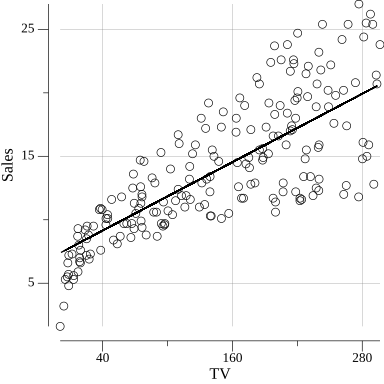

In [61]:
%%
df, err := getDataframe("../data/Advertising.csv")
if err != nil {
    fmt.Println(err)
    return
}

df = df.Select([]int{1,2,3,4})
plotRegression(df, "TV")

Seperti yang terlihat, garis regresi linier terlatih mengikuti tren linier dari titik data sebenarnya. Ini adalah konfirmasi visual lainnya bahwa model kita berada di jalur yang benar!